# Introdução

Esse projeto realiza uma análise nos [dados dos aposentados de poder executivo federal](http://www.dados.gov.br/dataset/aposentados-poder-executivo-federal). <br/>

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: ignored

# Bibliotecas necessárias

In [ ]:
from matplotlib import pyplot as plt
import datetime as dt
import pandas as pd
import scipy as sp
import numpy as np
import re

# Obtenção dos dados

In [ ]:
base_folder = '/content/gdrive/MyDrive/CD2022/dados'

In [ ]:
column_names = ['nome','cpf','matricula_servidor','nome_orgao','sigla_orgao',
                'codigo_orgao_superior','cargo','classe','padrao','referencia',
                'nivel','tipo_aposentadoria','fundamentacao_inatividade','nome_diploma_legal',
                'data_diploma_legal','ocorrencia_ingresso','data_ingresso','salario']

In [ ]:
df = pd.read_csv(base_folder+"/APOSENTADOS_022022_FULL.csv",names=column_names,header=None, sep = ";", encoding="ISO-8859-1")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,5,9,10,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,nome,cpf,matricula_servidor,nome_orgao,sigla_orgao,codigo_orgao_superior,cargo,classe,padrao,referencia,nivel,tipo_aposentadoria,fundamentacao_inatividade,nome_diploma_legal,data_diploma_legal,ocorrencia_ingresso,data_ingresso,salario
0,Nome,CPF,Matricula,Orgao,Sigla Orgao,Orgao vinculacao,Cargo emprego,Classe,Padrao,Referencia,Nivel,Tipo aposentadoria,Fund legal aposentadoria,Portaria aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria ...
1,ANTONIO ALVES BEZERRA ...,***686441**,130000000029,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,00000,AGENTE DE VIGILANCIA,S,II,00,000,VOLUNTARIA,APOS. VOLUNTARIA C/PROVENTOS INTEGRAIS,PORTARIA NO. 63194 PUBLICADO EM 30DEZ1994 ...,30121994,NOMEACAO PARA CARGO ...,15061962,"2.596,79"
2,ANTONIO CARLOS CONCEICAO MARTINS ...,***423941**,130000000033,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,00000,ESTATISTICO,S,III,00,000,VOLUNTARIA,CF 40 III A,PORTARIA NO. 26 PUBLICADO EM 31JAN1995 ...,31011995,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"10.750,99"
3,ARLINDA COSTA GUTEMBERG ...,***063691**,130000000048,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,00000,AUXILIAR DE ENFERMAGEM,S,III,00,000,VOLUNTARIA,APOS. VOLUNTARIA C/PROVENTOS INTEGRAIS,PORTARIA NO. 341 PUBLICADO EM 01JUL1990 ...,01071990,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"3.960,76"
4,BENTO MOREIRA LIMA JUNIOR ...,***460301**,130000000061,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,00000,AUDITOR FISCAL FEDERAL AGROPECUARIO,S,IV,00,000,APOSENTADORIA POR INVALIDEZ,CF 40 I INT,LEI NO. 21050 PUBLICADO EM 02JUL1990 ...,02071990,ADMISSAO SEM CONCURSO PUBLICO ...,08061961,"19.433,65"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417215,WALDIR TEIXEIRA ...,***952937**,700000970456,COMANDO DA MARINHA,CM,40105,AUXILIAR OPERAC EM AGROPECUARIA,S,III,0,0,VOLUNTARIA,EC47 3Ì,"PORT 001278/2010, BHMN PUB: DO 11NOV2010 ...",11112010,ADMISSAO SEM CONCURSO PUBLICO ...,17041984,"2.598,22"
417216,MARIA ESTRELA NUNES QUEIROZ ...,***738862**,700000956827,COMANDO DA MARINHA,CM,40105,AGENTE ADMINISTRATIVO,S,III,0,0,VOLUNTARIA,EC47 3Ì,"PORT 000199/2015, COM4DN PUB: DO 18SET2015 ...",18092015,ADMISSAO POR CONCURSO PUBLICO ...,17041985,"4.356,73"
417217,NEIDE PEREIRA CEZARIO ...,***531387**,700000974857,COMANDO DA MARINHA,CM,40105,AGENTE ADMINISTRATIVO,S,III,0,0,VOLUNTARIA,EC47 3Ì,"PORT 000819/2015, CDAM PUB: DO 21OUT2015 ...",21102015,ADMISSAO SEM CONCURSO PUBLICO ...,04101988,"3.197,45"
417218,JURACY ESTEVAM ALQUIE ...,***771101**,700002335071,COMANDO DA MARINHA,CM,40105,AGENTE ADMINISTRATIVO,S,III,0,0,COMPULSORIA,EC41 40 II,"PORT 000635/2018, DPCVM PUB: DO 31JUL2018 ...",17012008,DECISAO JUDICIAL ...,02121973,"3.756,30"


In [ ]:
df.drop([0],inplace=True)

In [ ]:
new = []
log=open('log.txt','w')
for i in df.index.values:
    temp = re.sub('[^\d]','',df['salario'][i].strip())
    try:
        log.write(f"Original:{df['salario'][i].strip()} Novo: {int(temp)/100}\n")
        new.append(int(temp)/100)
    except:
        new.append(np.nan)
new
log.close()

In [ ]:
df['salario_float']=new
df_dropped = df.dropna()
df_dropped

,nome,cpf,matricula_servidor,nome_orgao,sigla_orgao,codigo_orgao_superior,cargo,classe,padrao,referencia,nivel,tipo_aposentadoria,fundamentacao_inatividade,nome_diploma_legal,data_diploma_legal,ocorrencia_ingresso,data_ingresso,salario,salario_float
1,ANTONIO ALVES BEZERRA ...,***686441**,130000000029,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,00000,AGENTE DE VIGILANCIA,S,II,00,000,VOLUNTARIA,APOS. VOLUNTARIA C/PROVENTOS INTEGRAIS,PORTARIA NO. 63194 PUBLICADO EM 30DEZ1994 ...,30121994,NOMEACAO PARA CARGO ...,15061962,"2.596,79",2596.79
2,ANTONIO CARLOS CONCEICAO MARTINS ...,***423941**,130000000033,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,00000,ESTATISTICO,S,III,00,000,VOLUNTARIA,CF 40 III A,PORTARIA NO. 26 PUBLICADO EM 31JAN1995 ...,31011995,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"10.750,99",10750.99
3,ARLINDA COSTA GUTEMBERG ...,***063691**,130000000048,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,00000,AUXILIAR DE ENFERMAGEM,S,III,00,000,VOLUNTARIA,APOS. VOLUNTARIA C/PROVENTOS INTEGRAIS,PORTARIA NO. 341 PUBLICADO EM 01JUL1990 ...,01071990,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"3.960,76",3960.76
4,BENTO MOREIRA LIMA JUNIOR ...,***460301**,130000000061,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,00000,AUDITOR FISCAL FEDERAL AGROPECUARIO,S,IV,00,000,APOSENTADORIA POR INVALIDEZ,CF 40 I INT,LEI NO. 21050 PUBLICADO EM 02JUL1990 ...,02071990,ADMISSAO SEM CONCURSO PUBLICO ...,08061961,"19.433,65",19433.65
5,BERENICE MOREIRA SANTOS ...,***021701**,130000000062,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,00000,AGENTE ADMINISTRATIVO,S,III,00,000,VOLUNTARIA,VOLUNTARIA (ART. 186 ITEM III ALINEA A),PORTARIA NO. 253 PUBLICADO EM 31MAI1990 ...,31051990,NOMEACAO PARA CARGO ...,21121961,"3.430,07",3430.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417215,WALDIR TEIXEIRA ...,***952937**,700000970456,COMANDO DA MARINHA,CM,40105,AUXILIAR OPERAC EM AGROPECUARIA,S,III,0,0,VOLUNTARIA,EC47 3Ì,"PORT 001278/2010, BHMN PUB: DO 11NOV2010 ...",11112010,ADMISSAO SEM CONCURSO PUBLICO ...,17041984,"2.598,22",2598.22
417216,MARIA ESTRELA NUNES QUEIROZ ...,***738862**,700000956827,COMANDO DA MARINHA,CM,40105,AGENTE ADMINISTRATIVO,S,III,0,0,VOLUNTARIA,EC47 3Ì,"PORT 000199/2015, COM4DN PUB: DO 18SET2015 ...",18092015,ADMISSAO POR CONCURSO PUBLICO ...,17041985,"4.356,73",4356.73
417217,NEIDE PEREIRA CEZARIO ...,***531387**,700000974857,COMANDO DA MARINHA,CM,40105,AGENTE ADMINISTRATIVO,S,III,0,0,VOLUNTARIA,EC47 3Ì,"PORT 000819/2015, CDAM PUB: DO 21OUT2015 ...",21102015,ADMISSAO SEM CONCURSO PUBLICO ...,04101988,"3.197,45",3197.45
417218,JURACY ESTEVAM ALQUIE ...,***771101**,700002335071,COMANDO DA MARINHA,CM,40105,AGENTE ADMINISTRATIVO,S,III,0,0,COMPULSORIA,EC41 40 II,"PORT 000635/2018, DPCVM PUB: DO 31JUL2018 ...",17012008,DECISAO JUDICIAL ...,02121973,"3.756,30",3756.30


In [ ]:
df_dropped.to_csv(base_folder+'/conjunto_dados_fixed.csv',index=False)


In [ ]:
df = df_dropped

In [ ]:
df.columns

Index(['nome', 'cpf', 'matricula_servidor', 'nome_orgao', 'sigla_orgao',
       'codigo_orgao_superior', 'cargo', 'classe', 'padrao', 'referencia',
       'nivel', 'tipo_aposentadoria', 'fundamentacao_inatividade',
       'nome_diploma_legal', 'data_diploma_legal', 'ocorrencia_ingresso',
       'data_ingresso', 'salario', 'salario_float'],
      dtype='object')

# Análise exploratória

## Análises salariais

In [ ]:
idx = []
for i in df.index.values:
    if ',' not in df['salario'][i]:
        idx.append(i)
idx

[2156,
 21274,
 30877,
 30890,
 30904,
 30926,
 30935,
 30957,
 30976,
 30994,
 32110,
 33996,
 34497,
 34590,
 35042,
 35046,
 35640,
 35907,
 35999,
 36071,
 43078,
 47259,
 47527,
 47530,
 47655,
 47676,
 48558,
 49246,
 55828,
 83577,
 83593,
 83594,
 83604,
 86453,
 86946,
 92373,
 93356,
 93460,
 93742,
 98514,
 103749,
 104572,
 109301,
 109778,
 121363,
 122906,
 126153,
 127566,
 171328,
 172978,
 179592,
 192367,
 193476,
 203856,
 203857,
 203866,
 203868,
 203875,
 203876,
 203882,
 203885,
 203886,
 203890,
 203894,
 203895,
 203896,
 203898,
 203899,
 203913,
 203914,
 203946,
 203963,
 203976,
 203999,
 204005,
 204006,
 204009,
 204021,
 204023,
 204050,
 204051,
 204052,
 204070,
 204073,
 204077,
 204079,
 204083,
 204098,
 204100,
 204102,
 204103,
 204104,
 204106,
 204121,
 204127,
 204132,
 204135,
 204141,
 204156,
 204158,
 204172,
 204190,
 204212,
 204227,
 204228,
 204233,
 204236,
 204245,
 204246,
 204270,
 204291,
 204307,
 204308,
 204363,
 204366,
 20436

In [ ]:
df.drop(idx,axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.loc[df['salario_float']==119518.84].nome

70006    RUBENS GIRALDI JENSEN                         ...
Name: nome, dtype: object

In [ ]:
df.groupby(['sigla_orgao']).describe()

salario_float                                                 \
                    count          mean          std      min        25%   
sigla_orgao                                                                
ABIN                 74.0   8174.152432  6704.251754  2825.17  4808.0650   
AEB                   7.0   5500.125714  3250.416766  2836.34  3590.5850   
AGU                3219.0  11898.106875  6966.182311  1692.27  5158.2950   
ANA                  20.0  12458.978500  3069.967513  7080.29  9809.7550   
ANAC                161.0   7465.455217  2695.338185  1503.81  5484.3700   
...                   ...           ...          ...      ...        ...   
UNIPAMPA             21.0   5301.536190  3342.735272   998.56  3345.1500   
UNIR                368.0   6349.954293  3904.448392   938.44  3485.2400   
UNIRIO             1035.0   6329.292802  4051.962452   791.60  3404.3500   
UNIVASF              26.0   6866.293846  4294.793191   849.73  3408.6950   
UTFPR               888.0   8265.122410  4423.889970  1139.76  4675.1575   

                                              
                   50%         75%       max  
sigla_orgao                                   
ABIN          6868.920   9969.3725  56717.54  
AEB           3983.120   6514.3700  11471.51  
AGU          11245.390  18316.6000  75172.66  
ANA          12990.625  14853.2725  17567.87  
ANAC          7643.310   8493.6400  15067.00  
...                ...         ...       ...  
UNIPAMPA      5105.860   6333.1700  14096.32  
UNIR          5310.720   8039.2275  30128.88  
UNIRIO        5049.820   8020.1700  21557.14  
UNIVASF       6719.590  10229.6000  17962.50  
UTFPR         7276.920  11256.4125  28036.12  

[178 rows x 8 columns]

Maiores médias salariais em orgãos públicos

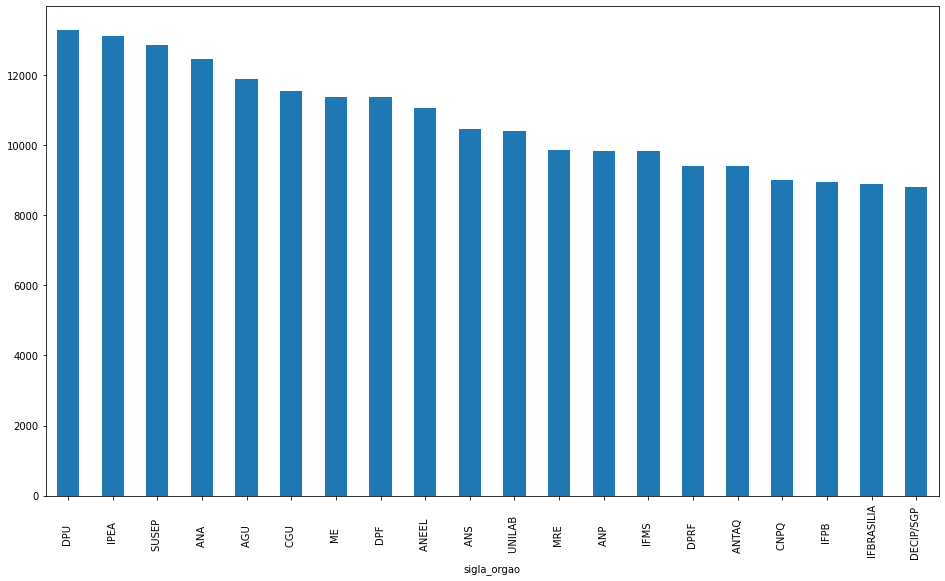

In [ ]:
df.groupby(['sigla_orgao'])['salario_float'].mean().sort_values(ascending=False)[:20].plot.bar(figsize=(16,9))

Menores médias salariais em orgãos públicos

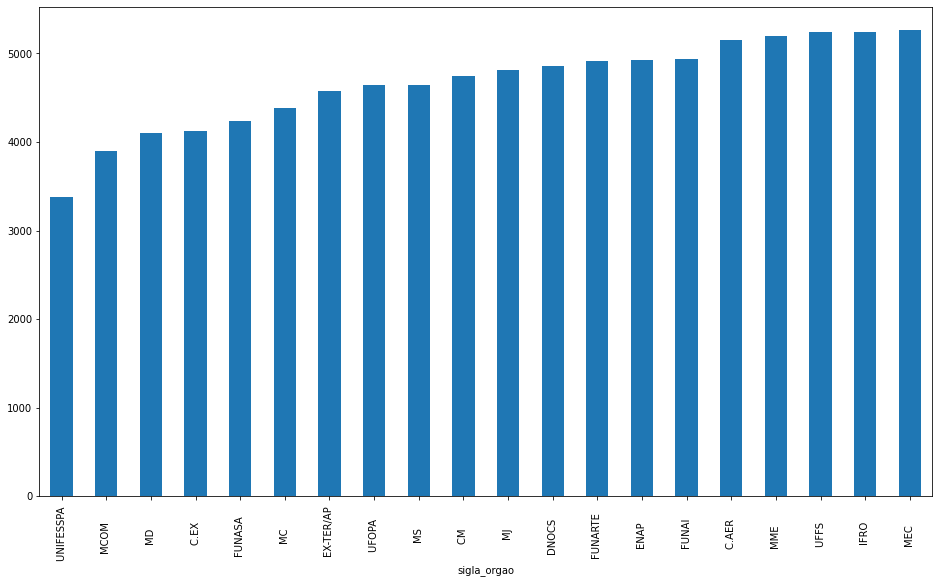

In [ ]:
df.groupby(['sigla_orgao'])['salario_float'].mean().sort_values(ascending=True)[:20].plot.bar(figsize=(16,9))

Maiores salários em orgãos públicos

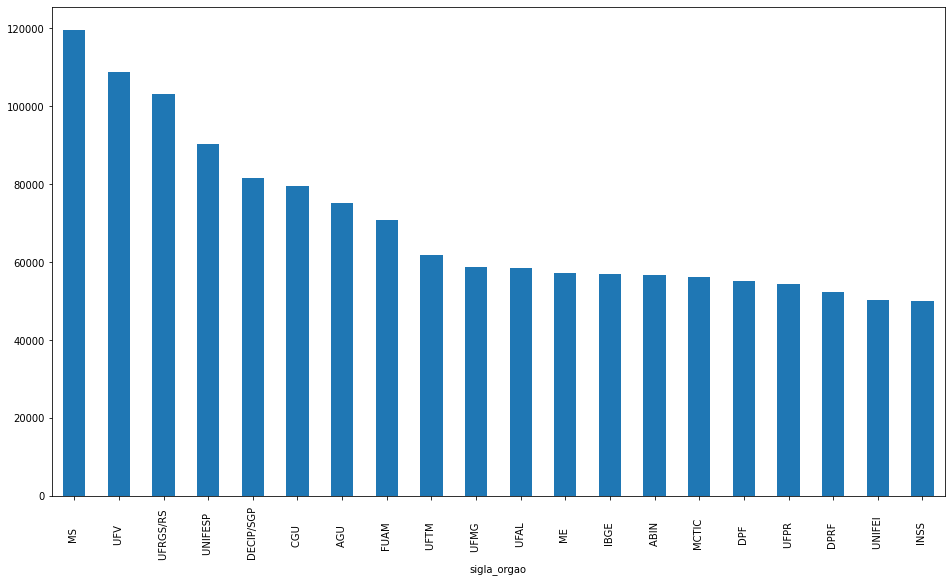

In [ ]:
df.groupby(['sigla_orgao'])['salario_float'].max().sort_values(ascending=False)[:20].plot.bar(figsize=(16,9))

Maiores salários iniciais em orgãos públicos

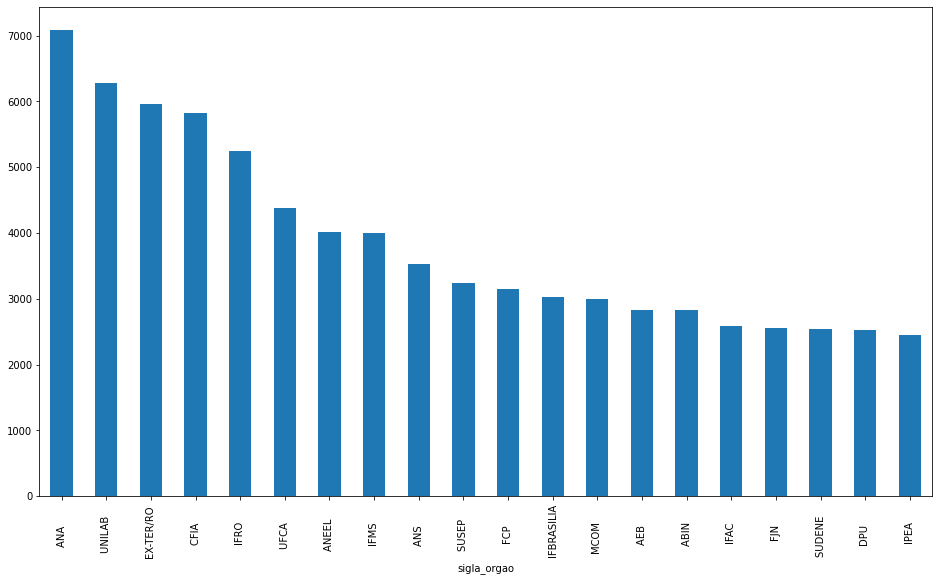

In [ ]:
df.groupby(['sigla_orgao'])['salario_float'].min().sort_values(ascending=False)[:20].plot.bar(figsize=(16,9))

## Análise de tipos de aposentadoria

In [ ]:
df.groupby('tipo_aposentadoria').count()

,nome,cpf,matricula_servidor,nome_orgao,sigla_orgao,codigo_orgao_superior,cargo,classe,padrao,referencia,nivel,fundamentacao_inatividade,nome_diploma_legal,data_diploma_legal,ocorrencia_ingresso,data_ingresso,salario
tipo_aposentadoria,,,,,,,,,,,,,,,,,
,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
APOSENTADORIA POR INVALIDEZ,31383,31383,31383,31383,31383,31383,31383,31383,31383,31383,31383,31383,31383,31383,31383,31383,31383
COMPULSORIA,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393,4393
INCAPACIDADE,633,633,633,633,633,633,633,633,633,633,633,633,633,633,633,633,633
OUTROS,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144
VOLUNTARIA,380665,380665,380665,380665,380665,380665,380665,380665,380665,380665,380665,380665,380665,380664,380665,380665,380665


In [ ]:
idx = []
for i in df.index.values:
    if df['tipo_aposentadoria'][i].strip() == '':
        idx.append(i)
idx

[1038]

In [ ]:
df.drop(idx,inplace=True)

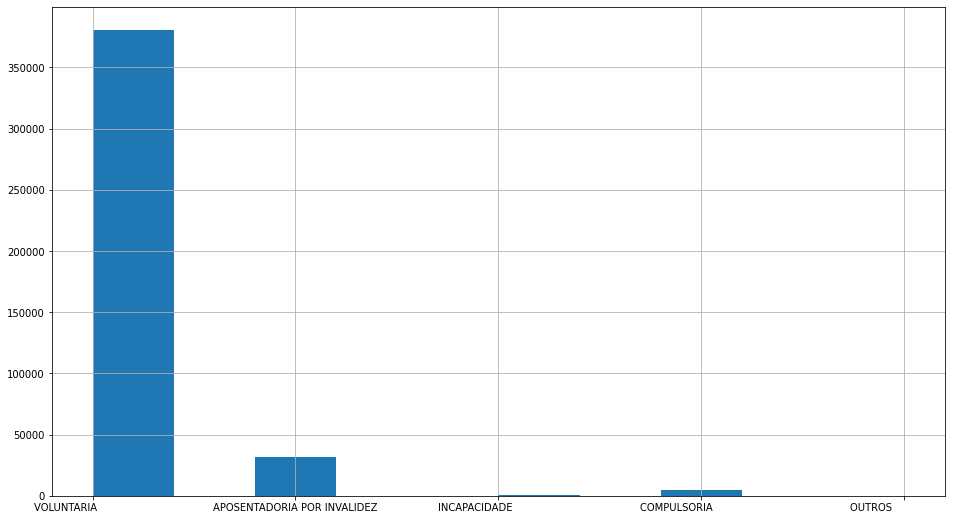

In [ ]:
df['tipo_aposentadoria'].hist(figsize=(16,9))

In [ ]:
for i in range(5):
    print(df['tipo_aposentadoria'].value_counts()[i]/len(df))

0.9123887272361212
0.07521966933353787
0.010529267673015066
0.0015171924509489044
0.00034514330637700196


Com isso, sabemos que ocorreram 5 tipos de aposentadorias durante o período de análise: Aposentadoria por invalidez (10,52%), compulsória (7,52%), por incapacidade (1,51%), outros motivos não descritos (0,34%) e aposentadoria voluntária (91,23%), sendo essa última a mais comum.

## Análise por orgãos

In [ ]:
df['nome_orgao'].nunique()

178

O conjunto de dados registra aposentados de um total de 178 orgãos públicos

In [ ]:
df['nome_orgao'].value_counts()

MINISTERIO DA SAUDE                         85182
DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.     58691
INSTITUTO NACIONAL DE SEGURO SOCIAL         38888
FUNDACAO NACIONAL DE SAUDE                  11364
COMANDO DO EXERCITO                         10520
                                            ...  
UNIVERSIDADE FED. SUL SUDESTE DO PARA           4
UN. INT.INTERN. LUSOFONIA AFROBRASILEIRA        4
MINISTERIO DAS COMUNICACOES                     3
INSTITUTO FEDERAL DE RONDONIA                   1
CAIXA DE FINANCIAMENTO IMOB.AERONAUTICA         1
Name: nome_orgao, Length: 178, dtype: int64

In [ ]:
df_count_sigla = df.groupby('sigla_orgao').nome.agg(['count']).query('count >= 30').sort_values('count', ascending=False)[:15]

In [ ]:
df_count_nome = df.groupby('nome_orgao').nome.agg(['count']).query('count >= 30').sort_values('count', ascending=False)[:15]

In [ ]:
X = df_count_sigla.index.values
y = df_count_sigla['count'].values
y

array([85182, 58691, 38888, 11364, 10520, 10004,  7953,  7620,  7573,
        7536,  7389,  6806,  6615,  6227,  5849])

In [ ]:
df_count_nome.index.values

array(['MINISTERIO DA SAUDE                     ',
       'DEP.DE CENTRAL.SERV.DE INATIVOS E PENS. ',
       'INSTITUTO NACIONAL DE SEGURO SOCIAL     ',
       'FUNDACAO NACIONAL DE SAUDE              ',
       'COMANDO DO EXERCITO                     ',
       'MINIST.DA AGRICULTURA,PECUARIA E ABAST. ',
       'COMANDO DA MARINHA                      ',
       'FUND. INST. BRASIL. GEOG. E ESTATISTICA ',
       'DEPARTAMENTO DE POLICIA FEDERAL         ',
       'UNIVERSIDADE FEDERAL DO RIO DE JANEIRO  ',
       'COMANDO DA AERONAUTICA                  ',
       'MINISTERIO CIENCIA TEC.INOV.COMUNICACOES',
       'DEPTO. DE POLICIA RODOVIARIA FEDERAL    ',
       'UNIVERSIDADE FEDERAL DE MINAS GERAIS    ',
       'MINISTERIO DA ECONOMIA                  '], dtype=object)

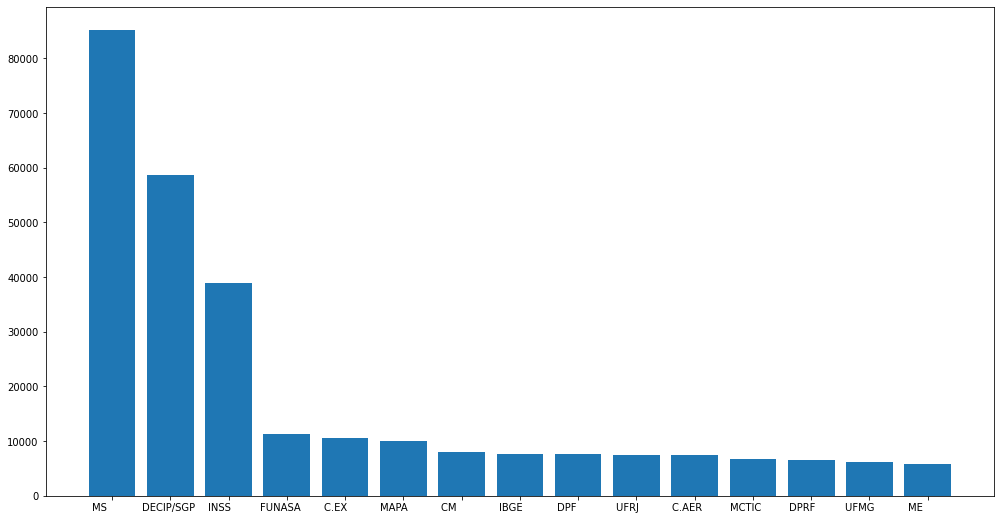

In [ ]:
plt.figure(figsize=(17,9))
plt.bar(X,y)
plt.savefig('/content/gdrive/MyDrive/CD2022/graficos/orgaos_aposentados.pdf')
plt.show()

In [ ]:
for i in range(5):
    print(df['nome_orgao'].value_counts()[i]/len(df))

0.2041666466930957
0.14067226246230988
0.09320786734992258
0.02723755926158507
0.025214635993653197


Os orgãos públicos com maior número de aposentados são o **Ministério da Saúde (20,41%), o DECIPEX (14,06%), o INSS (9,32%), a Fundação Nacional de Saúde (2,72%) e o Exército (2,52%)**.

## Análise de fundamentações utilizadas

In [ ]:
df['fundamentacao_inatividade'].nunique()

481

In [ ]:
df['fundamentacao_inatividade'].value_counts()[:20]

EC47 3Ì                                     138799
CF 40 III C                                  25776
EC41 6Ì                                      23148
EC103 3Ì EC47 3Ì                             20160
VOLUNTARIA (ART. 186,ITEM III,ALINEA C)      17930
CF 40 III A L8112 192 II                     11787
CF 40 III A                                   8963
APOS. VOLUNTARIA C/PROVENTOS INTEGRAIS        8529
VOLUNTARIA (ART. 186 ITEM III ALINEA A)       7173
VOLUNTARIA ( ART. 192 ITEM II)                6939
LC 51 1Ì I                                    6508
EC41 6Ì Ý 5Ì                                  6441
EC41 40 I 6-A EC70 INT                        6172
EC41 40 I 6-A EC70 PROP                       5616
CF 40 III A L1711 184 II                      5041
VOLUNTARIA ( C/ ART. 192 INCISO I)            4643
AP.VOL.PROV.INT,E ART.184 II, L.1711/52       4550
EC20 8Ì I, II, III                            4059
CF 40 III A L8112 192 I                       3981
EC41 40 III A                  

In [ ]:
df['fundamentacao_inatividade'].value_counts()[0]/len(df)

0.3326774012626493

Com isso, temos que as aposentadorias se basearam em 482 fundamentações diferentes, tendo 33,26% se baseado Emenda Constitucional 47, terceiro inciso, ou seja, **aposentadoria por idade**. 

## Análise dos tipos de ingresso no serviço público

In [ ]:
df['ocorrencia_ingresso'].value_counts()[:6]

ADMISSAO POR CONCURSO PUBLICO                         229569
ADMISSAO SEM CONCURSO PUBLICO                         138690
NOMEACAO PARA CARGO                                    19186
NOMEACAO CARATER EFETIVO,ART.9,ITEM I ,LEI 8112/90      8852
                                                        7536
TRANSPOSICAO/TRANSFORMACAO                              4532
Name: ocorrencia_ingresso, dtype: int64

In [ ]:
ingresso = df['ocorrencia_ingresso'].nunique()

192

In [ ]:
for i in range(5):
    print(df['ocorrencia_ingresso'].value_counts()[i]/len(df))

0.5502375257059858
0.33241614695435
0.0459855519177025
0.02121672602811959
0.018062499700396435


Desse modo, percebemos que existem diversas formas de chegar a um cargo do serviço público, com a base registrando um total de 192 maneiras diferentes. A maior parte delas ocorre por meio de admissão direta por concurso público, ou seja, o aprovado assumindo seu cargo inicial. <br/>

No geral, as maneiras mais populares são **Admissão por Concurso Público (55,02%), Admissão sem Concurso Público (33,24%), Nomeação para Cargo (4,59%) e Nomeação Carater Efetivo (ART.9, ITEM I, LEI 8112/90) (2,12%)**.<br/>

É importante mencionar que um total de 7537 servidores (1,80%) ingressaram ao serviço público de um modo não registrado pelo conjunto de dados, sendo essa a quinta forma mais comum de ingresso.

## Análise das informações de referências

In [ ]:
df['nome_diploma_legal'].value_counts()

DEC 009498/2018, AUT.EXT.: PR PUB: DO 11SET2018                 30634
DEC 010620/2021, AUT.EXT.: PR PUB: DO 05FEV2021                 14068
DEC 009679/2019, AUT.EXT.: PR PUB: DO 02JAN2019                 12530
NO. PUBLICADO EM                                                 5614
LEI 011892/2008, AUT.EXT.: PR PUB: DO 30DEZ2008                  4613
                                                                ...  
PORT 000284/2020, UPAG/RO PUB: DO 31AGO2020                         1
PORT 000076/2019, UPAG/RO PUB: DO 28FEV2019                         1
PORT 000492/2019, UPAG/RO PUB: DO 30SET2019                         1
PORT 000083/2019, UPAG/RO PUB: DO 28FEV2019                         1
PORTARIA 1099 DE 21/07/1976 - DOU 10/08/1976                        1
Name: nome_diploma_legal, Length: 318322, dtype: int64

## Análise das datas de aposentadoria

In [ ]:
df.columns

Index(['nome', 'cpf', 'matricula_servidor', 'nome_orgao', 'sigla_orgao',
       'codigo_orgao_superior', 'cargo', 'classe', 'padrao', 'referencia',
       'nivel', 'tipo_aposentadoria', 'fundamentacao_inatividade',
       'nome_diploma_legal', 'data_diploma_legal', 'ocorrencia_ingresso',
       'data_ingresso', 'salario'],
      dtype='object')

In [ ]:
dates = pd.to_datetime(df['data_diploma_legal'],format='%d%m%Y',errors='coerce')
dates

1        1994-12-30
2        1995-01-31
3        1990-07-01
4        1990-07-02
5        1990-05-31
            ...    
417215   2010-11-11
417216   2015-09-18
417217   2015-10-21
417218   2008-01-17
417219   1976-08-10
Name: data_diploma_legal, Length: 417218, dtype: datetime64[ns]

In [ ]:
dates_by_year = dates.groupby([dates.dt.year]).agg('count')
dates_by_year

data_diploma_legal
1950.0        1
1951.0        2
1952.0        3
1953.0        3
1954.0        1
          ...  
2018.0    17639
2019.0    36563
2020.0    13755
2021.0    11097
2022.0     1445
Name: data_diploma_legal, Length: 73, dtype: int64

In [ ]:
X = dates_by_year.index.values
y = dates_by_year.values
y

array([    1,     2,     3,     3,     1,     4,     2,     5,     6,
           6,    12,     7,    14,    11,    18,    28,    38,    58,
          66,   100,   131,   114,   138,   146,   126,   148,   492,
        2165,  1240,   981,  1540,  1313,  1381,  1651,  1328,  1086,
        1712,  1263,  1831,  3154,  8093, 17196,  9503, 11838, 10643,
       20462, 17550, 15154, 13508,  5830,  3616,  3974,  5958, 12745,
        4354,  3989,  5037,  6788,  8240, 11391, 12007, 13065, 13728,
       14423, 13969, 14981, 14297, 20841, 17639, 36563, 13755, 11097,
        1445])

In [ ]:
import numpy as np

In [ ]:
np.sum([    1,     2,     3,     3,     1,     4,     2,     5,     6,
           6,    12,     7,    14,    11,    18,    28,    38,    58,
          66,   100,   131,   114,   138,   146,   126,   148,   492,
        2165,  1240,   981,  1540,  1313,  1381,  1651,  1328,  1086,
        1712,  1263,  1831,  3154,  8093, 17196,  9503, 11838, 10643,
       20462, 17550, 15154, 13508,  5830,  3616,  3974,  5958, 12745,
        4354,  3989,  5037,  6788,  8240, 11391, 12007, 13065, 13728,
       14423, 13969, 14981, 14297, 20841, 17639, 36563, 13755, 11097,
        1445])

416004

In [ ]:
X

array([1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958.,
       1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
       1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003.,
       2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012.,
       2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021.,
       2022.])

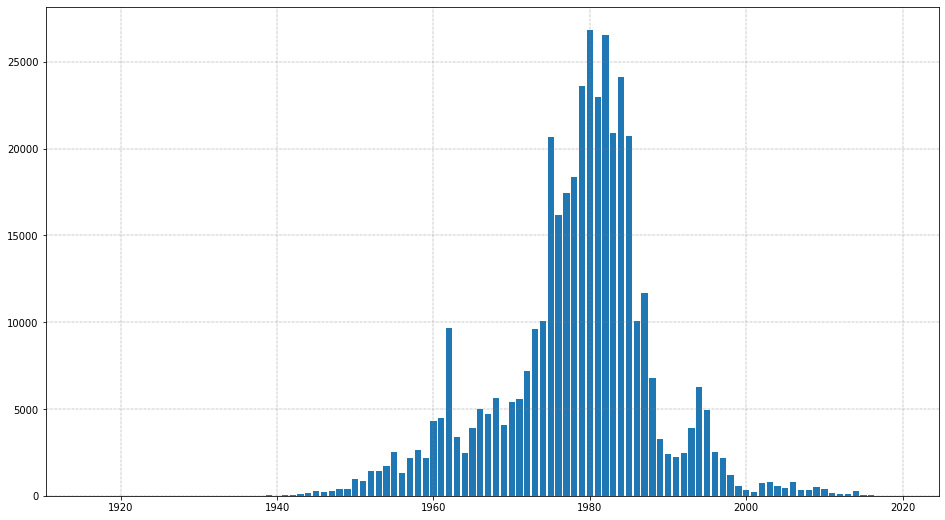

In [ ]:
plt.figure(figsize=(16,9))
plt.bar(X,y)
plt.grid(True, color = "grey", linewidth = "0.4", linestyle = "-.")
plt.savefig('/content/gdrive/MyDrive/CD2022/graficos/aposentadorias_por_ano.png')
plt.show()

## Análise das datas de ingresso no serviço público


In [ ]:
df.columns

Index(['nome', 'cpf', 'matricula_servidor', 'nome_orgao', 'sigla_orgao',
       'codigo_orgao_superior', 'cargo', 'classe', 'padrao', 'referencia',
       'nivel', 'tipo_aposentadoria', 'fundamentacao_inatividade',
       'nome_diploma_legal', 'data_diploma_legal', 'ocorrencia_ingresso',
       'data_ingresso', 'salario'],
      dtype='object')

In [ ]:
dates = pd.to_datetime(df['data_ingresso'],format='%d%m%Y',errors='coerce')
dates

1        1962-06-15
2        1962-06-15
3        1962-06-15
4        1961-06-08
5        1961-12-21
            ...    
417215   1984-04-17
417216   1985-04-17
417217   1988-10-04
417218   1973-12-02
417219   1953-05-16
Name: data_ingresso, Length: 417218, dtype: datetime64[ns]

In [ ]:
dates_by_year = dates.groupby([dates.dt.year]).agg('count')
dates_by_year

In [ ]:
X = dates_by_year.index.values
y = dates_by_year.values
y

array([    1,     1,     1,     1,     3,     1,     2,     1,     8,
           3,    10,    18,    17,    45,    62,   124,   148,   254,
         210,   277,   367,   396,   970,   832,  1403,  1438,  1730,
        2506,  1321,  2180,  2614,  2181,  4303,  4464,  9688,  3380,
        2450,  3929,  4991,  4714,  5654,  4074,  5379,  5590,  7179,
        9587, 10093, 20672, 16160, 17435, 18336, 23618, 26835, 22994,
       26558, 20909, 24146, 20694, 10077, 11668,  6796,  3255,  2387,
        2230,  2479,  3912,  6253,  4959,  2510,  2163,  1197,   558,
         310,   202,   729,   803,   569,   455,   822,   334,   328,
         514,   384,   177,   109,   116,   260,    32,    32,    11,
           7,     1])

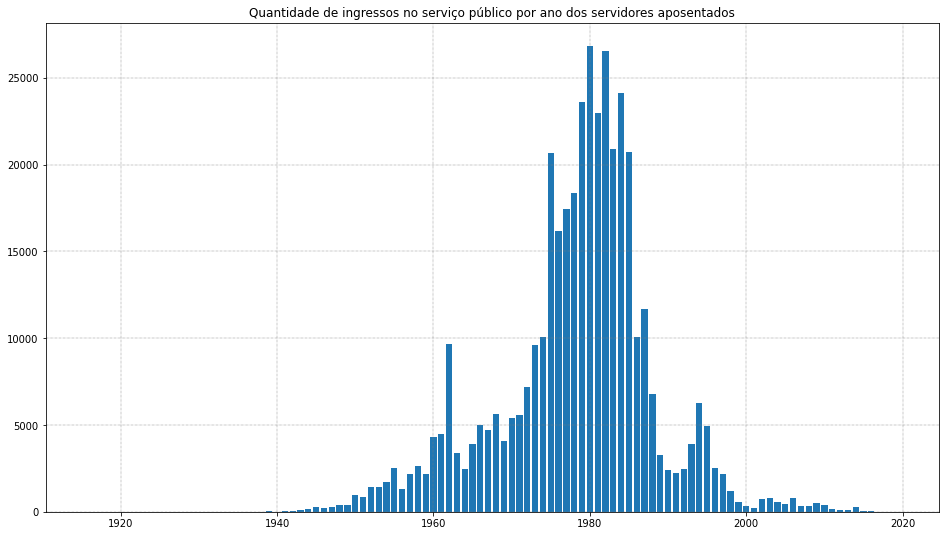

In [ ]:
plt.figure(figsize=(16,9))
plt.bar(X,y)
plt.grid(True, color = "grey", linewidth = "0.4", linestyle = "-.")
plt.title("Quantidade de ingressos no serviço público por ano dos servidores aposentados")
plt.savefig('/content/gdrive/MyDrive/CD2022/graficos/aposentadorias_por_ano.png')
plt.show()

## Análise do tempo de serviço

In [ ]:
df['data_ingresso'] = pd.to_datetime(df['data_ingresso'],format='%d%m%Y',errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['data_diploma_legal'] = pd.to_datetime(df['data_diploma_legal'],format='%d%m%Y',errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['tempo_servico'] = (df['data_diploma_legal'] - df['data_ingresso']).dt.days/365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Quantidade de aposentados')

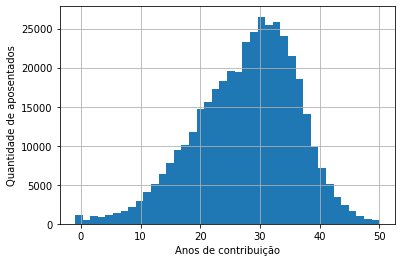

In [ ]:
axarr = df['tempo_servico'].hist(bins=40,range=[-1,50])
axarr.set_xlabel("Anos de contribuição")
axarr.set_ylabel("Quantidade de aposentados")

# Inferência nos dados

## Regressão para prever o salário



In [ ]:
df.columns

Index(['nome', 'cpf', 'matricula_servidor', 'nome_orgao', 'sigla_orgao',
       'codigo_orgao_superior', 'cargo', 'classe', 'padrao', 'referencia',
       'nivel', 'tipo_aposentadoria', 'fundamentacao_inatividade',
       'nome_diploma_legal', 'data_diploma_legal', 'ocorrencia_ingresso',
       'data_ingresso', 'salario', 'salario_float', 'tempo_servico'],
      dtype='object')

In [ ]:
remove_cols = ['nome','cpf','matricula_servidor','nome_orgao','codigo_orgao_superior',
               'classe','padrao','referencia','nivel','nome_diploma_legal',
               'data_diploma_legal','ocorrencia_ingresso','data_ingresso','salario','salario_float']

In [ ]:
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
x = df.drop(remove_cols,axis=1)
y = df['salario_float']

In [ ]:
from sklearn import preprocessing

In [ ]:
x.columns

Index(['sigla_orgao', 'cargo', 'tipo_aposentadoria',
       'fundamentacao_inatividade', 'tempo_servico'],
      dtype='object')

In [ ]:
x.dropna(inplace=True)

In [ ]:
to_encode = ['sigla_orgao', 'cargo', 'tipo_aposentadoria',
       'fundamentacao_inatividade']

In [ ]:
X_encoded = []
for c in to_encode:
    le = preprocessing.LabelEncoder()
    le.fit(x[c])
    n = le.transform(x[c])
    X_encoded.append(n)
X_encoded.append(np.array(x['tempo_servico']))

In [ ]:
X = np.array(X_encoded).T

In [ ]:
X

array([[104.        , 100.        ,   4.        ,  23.        ,
         32.56438356],
       [104.        , 683.        ,   4.        ,  62.        ,
         32.65205479],
       [104.        , 431.        ,   4.        ,  23.        ,
         28.0630137 ],
       ...,
       [ 23.        ,  28.        ,   4.        , 307.        ,
         27.0630137 ],
       [ 23.        ,  28.        ,   1.        , 282.        ,
         34.14794521],
       [ 23.        ,  28.        ,   4.        , 133.        ,
         23.25205479]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
regr = DecisionTreeRegressor(random_state=0)
regr.fit(X_train, y_train)
regr.score(X_test,y_test)

0.44434028000521786

In [ ]:
lrgr=LinearRegression()
lrgr.fit(X_train,y_train)
lrgr.score(X_test,y_test)

0.04146718829870566

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
regr.score(X_test,y_test)

0.6509673859667839

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test,y_test)